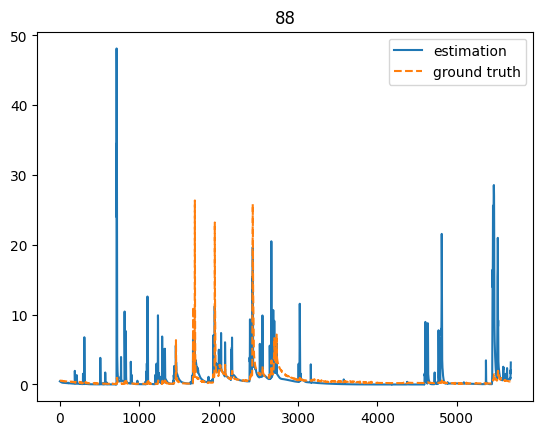

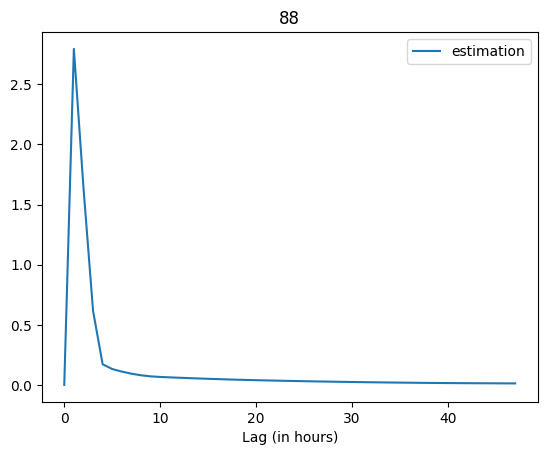

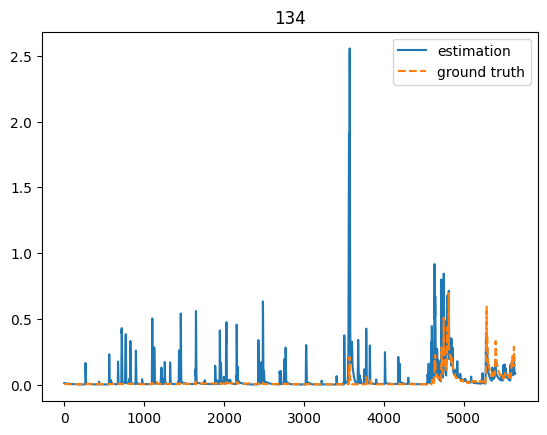

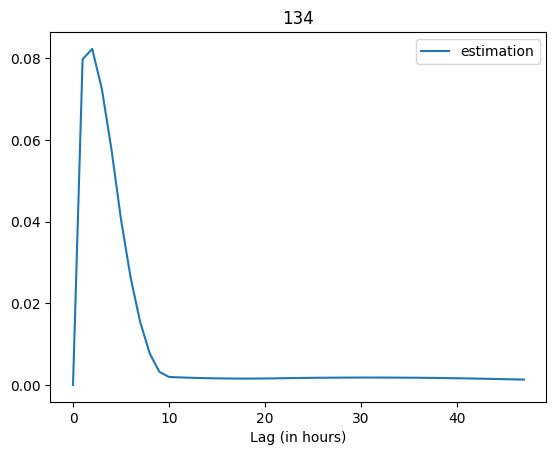

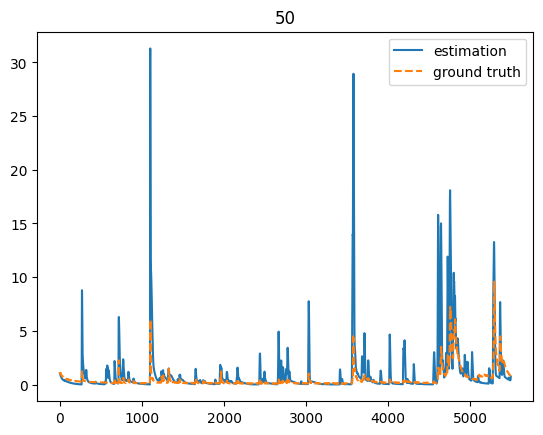

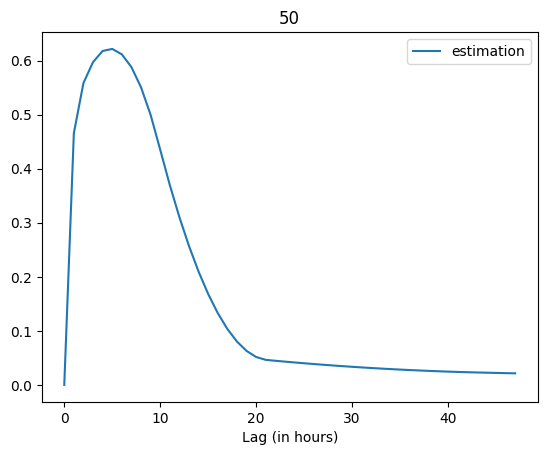

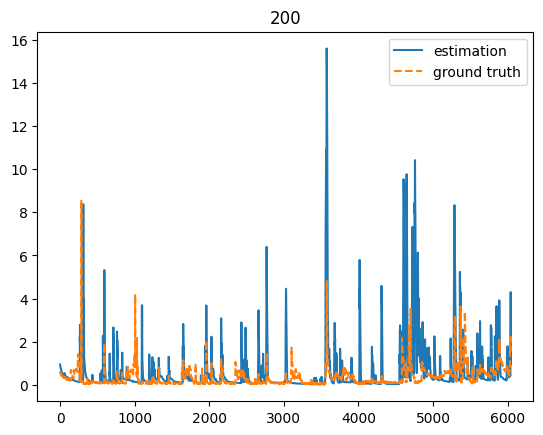

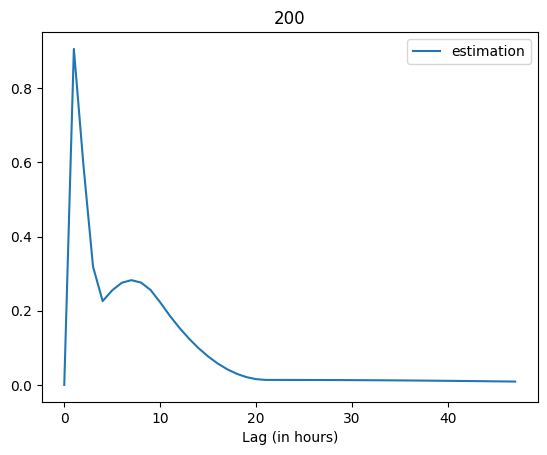

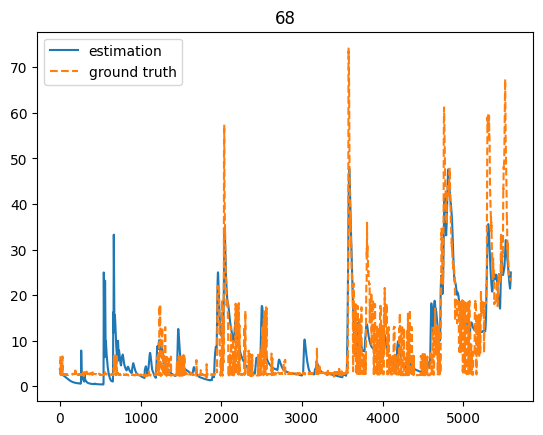

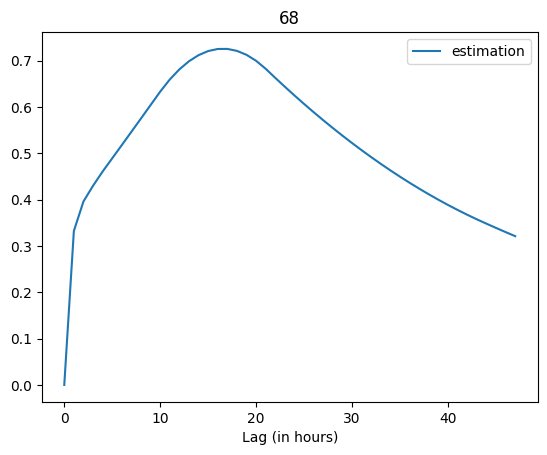

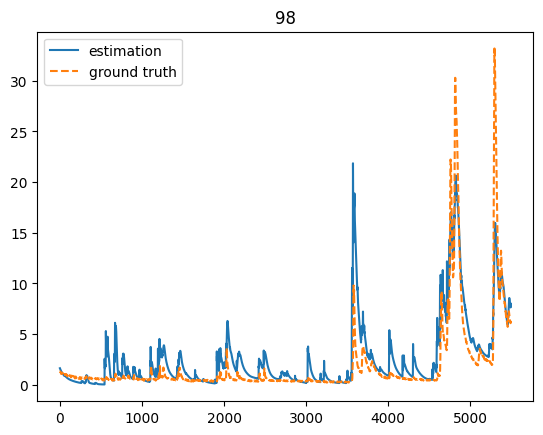

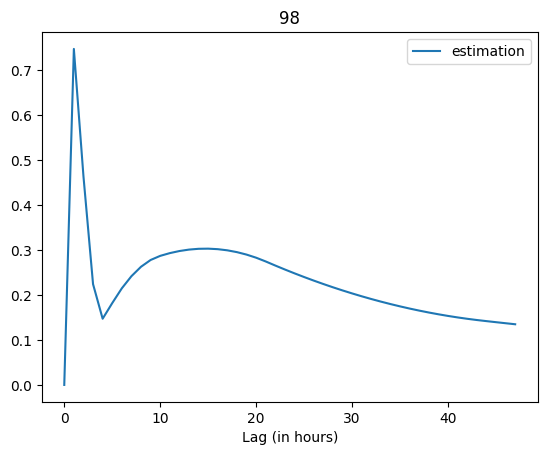

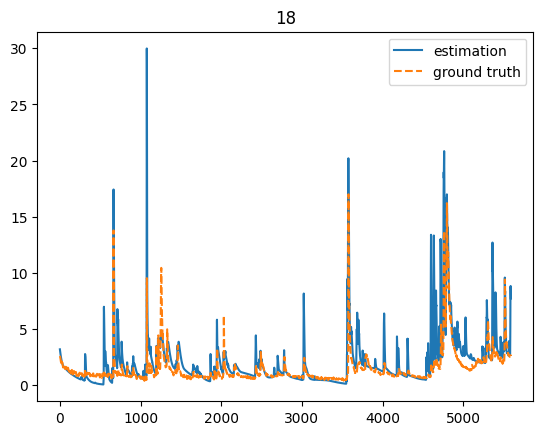

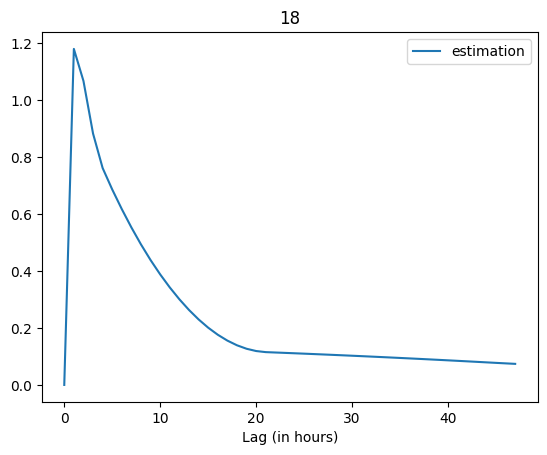

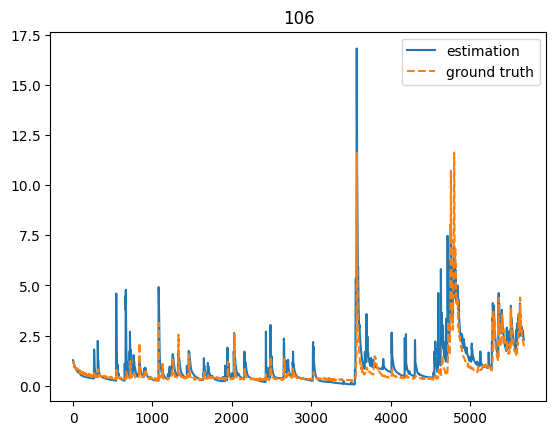

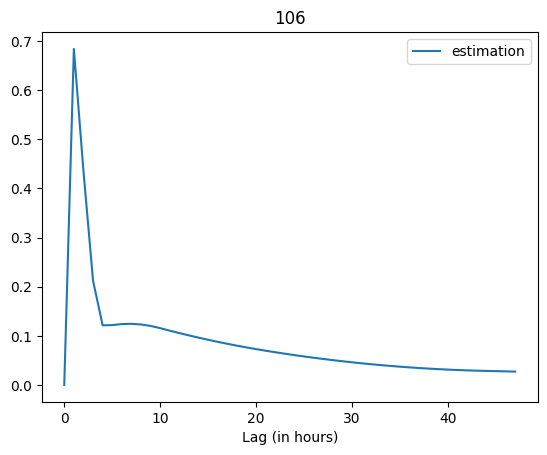

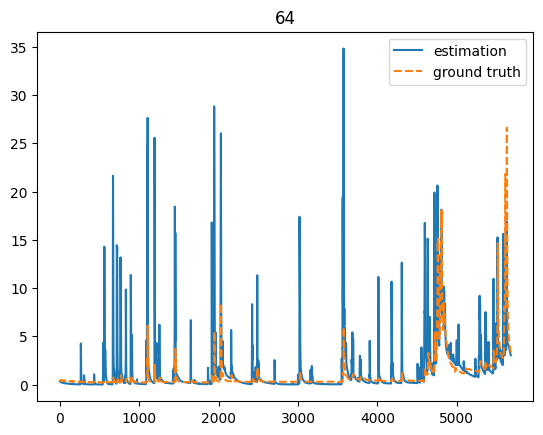

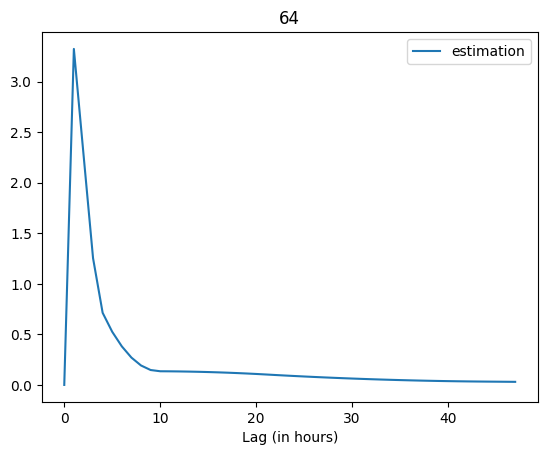

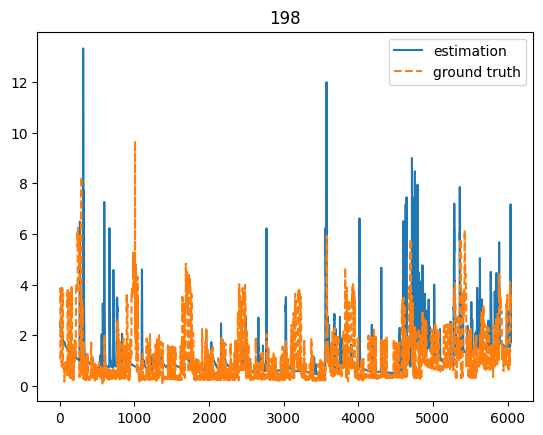

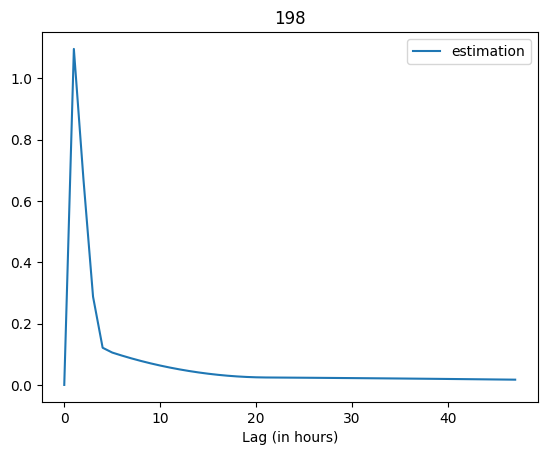

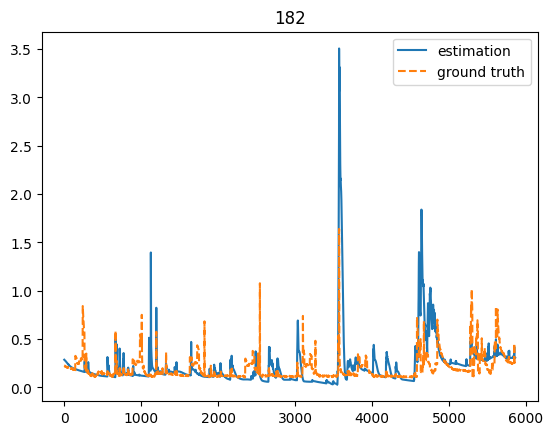

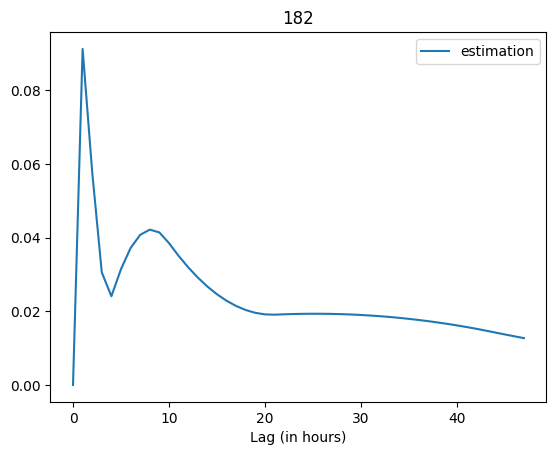

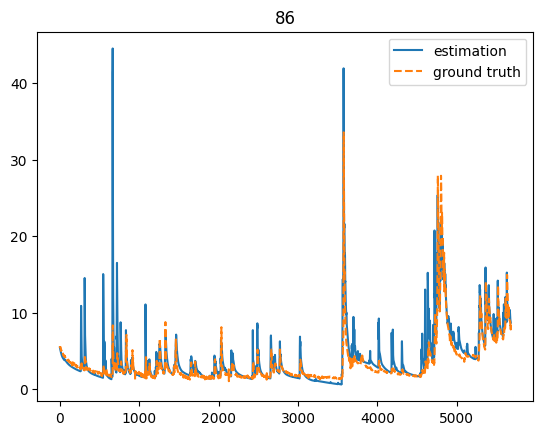

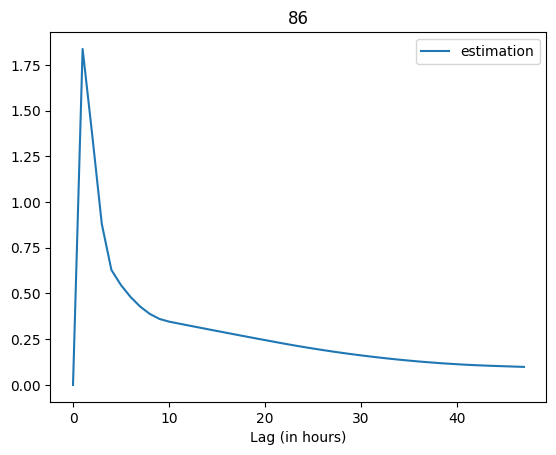

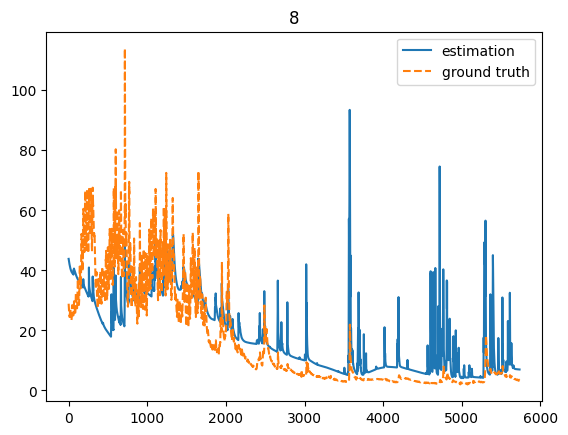

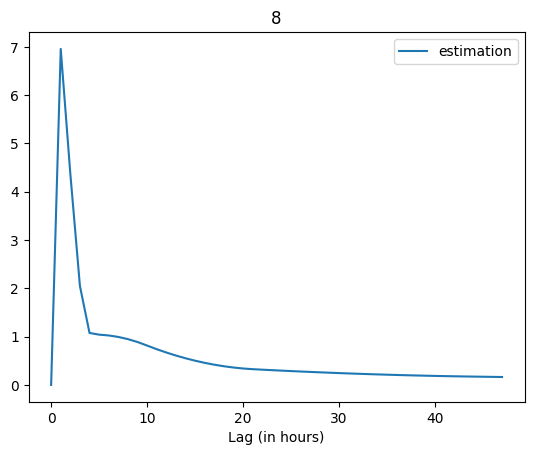

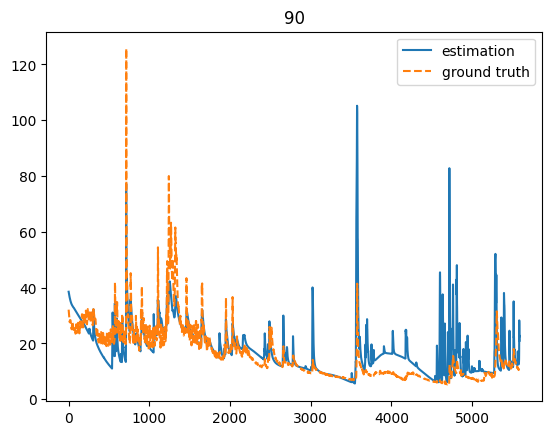

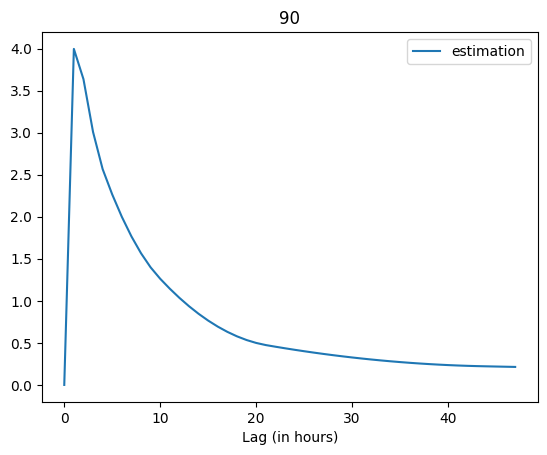

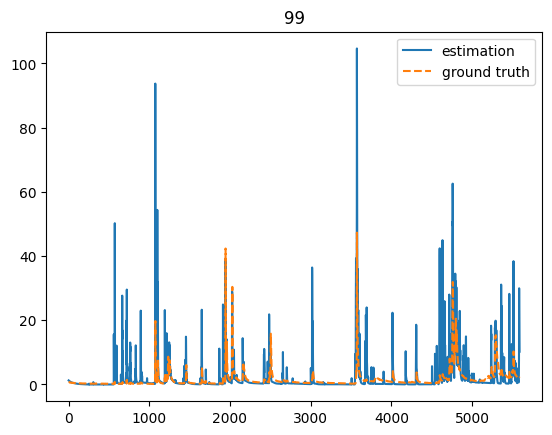

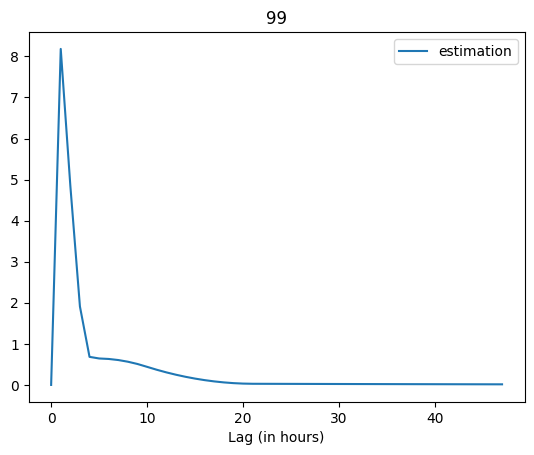

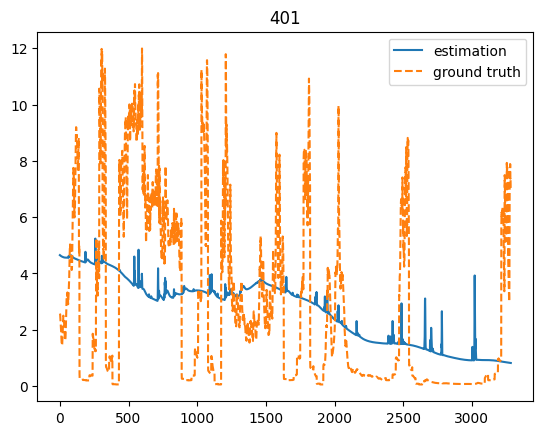

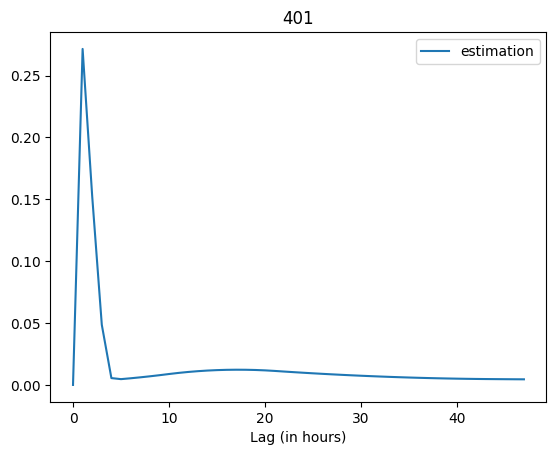

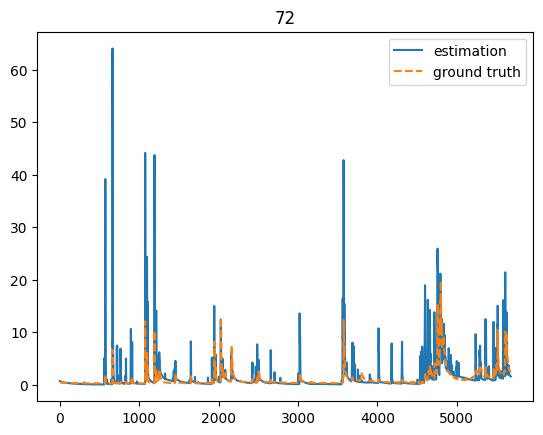

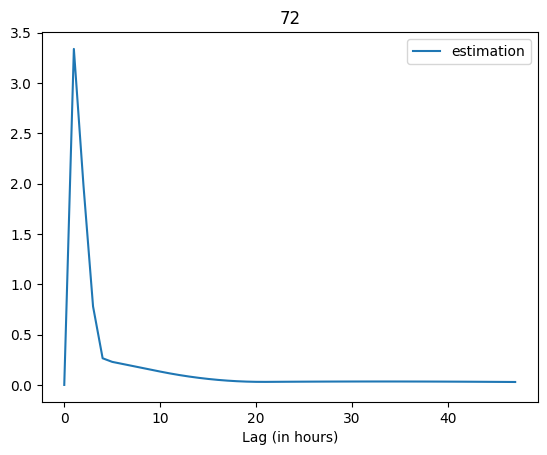

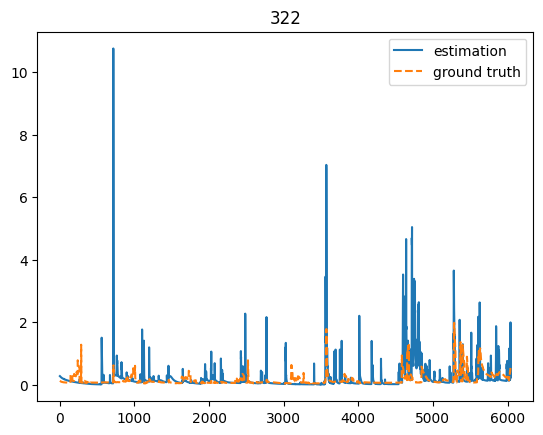

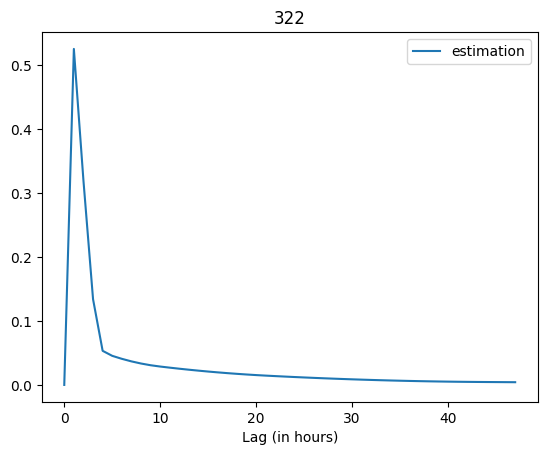

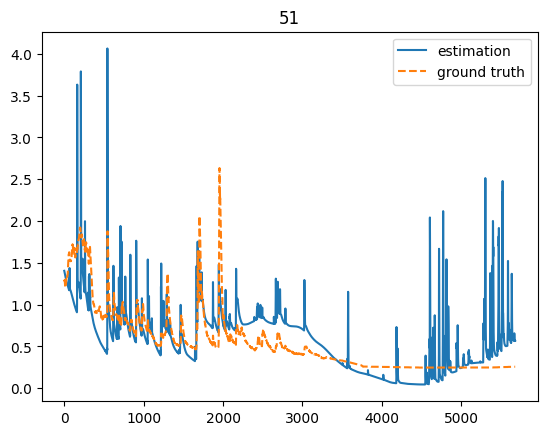

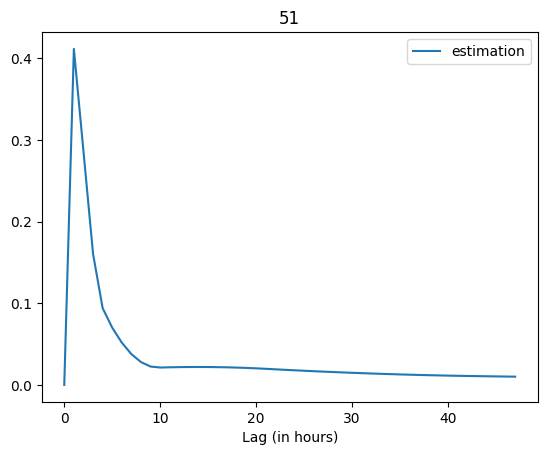

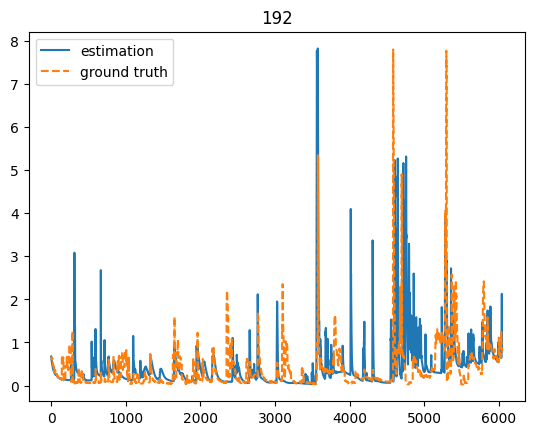

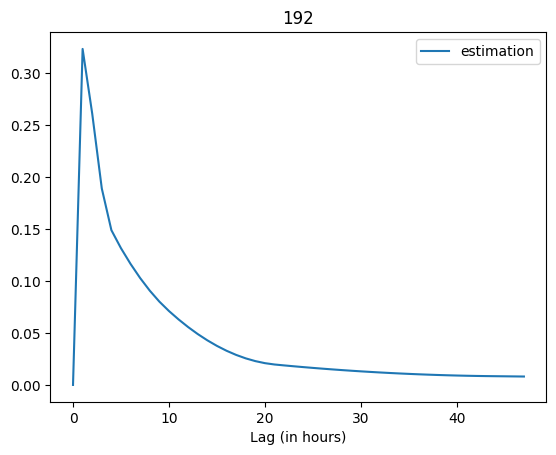

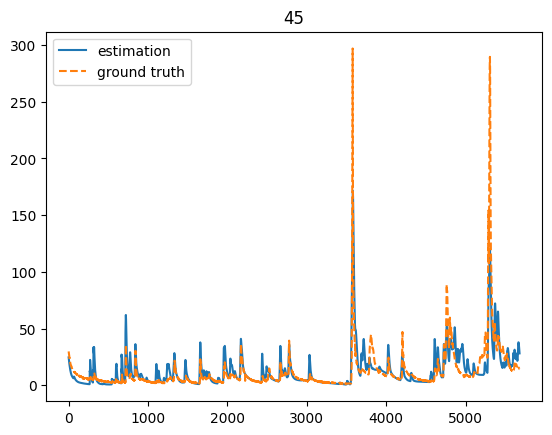

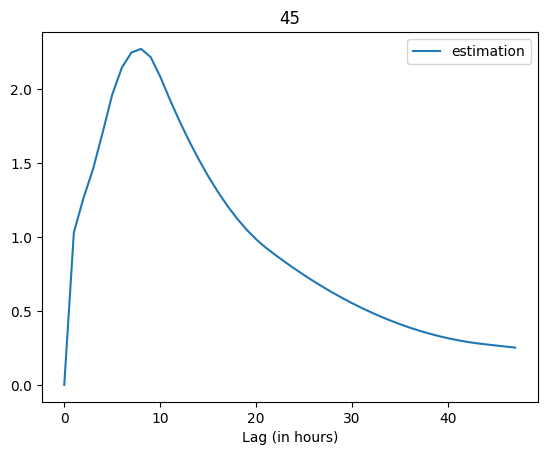

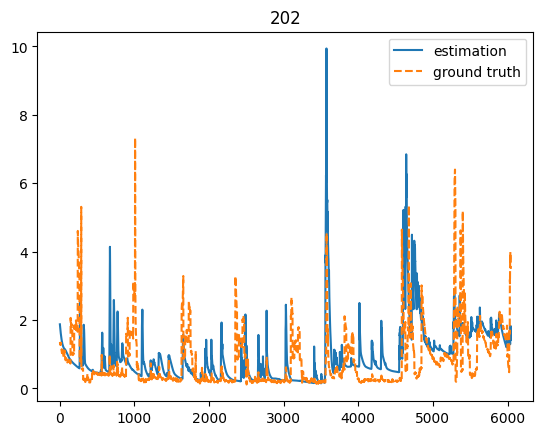

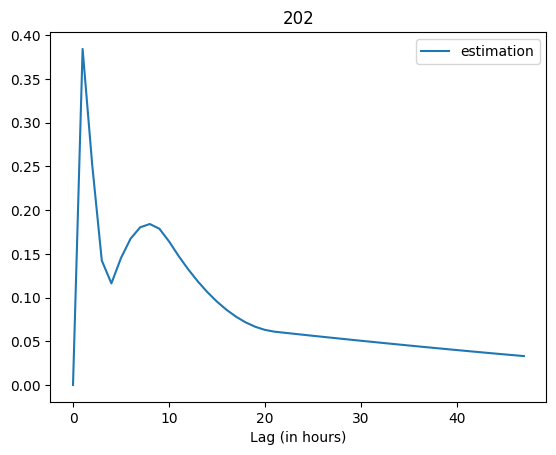

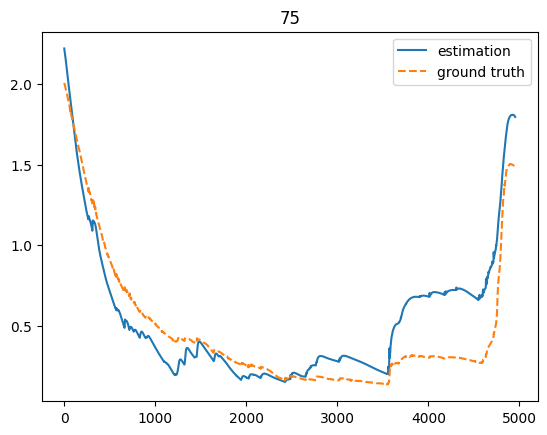

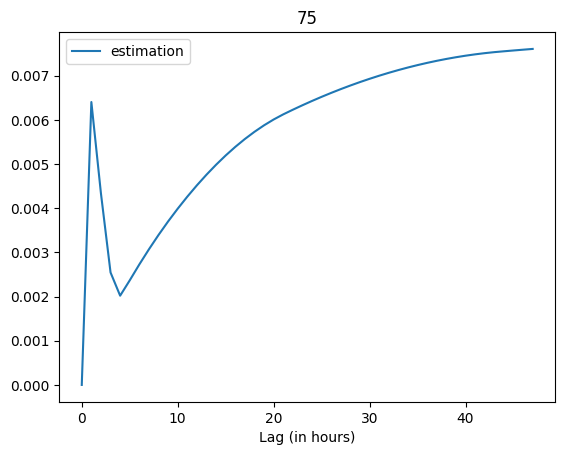

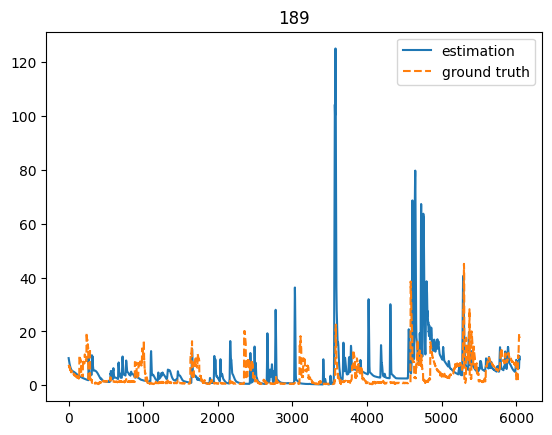

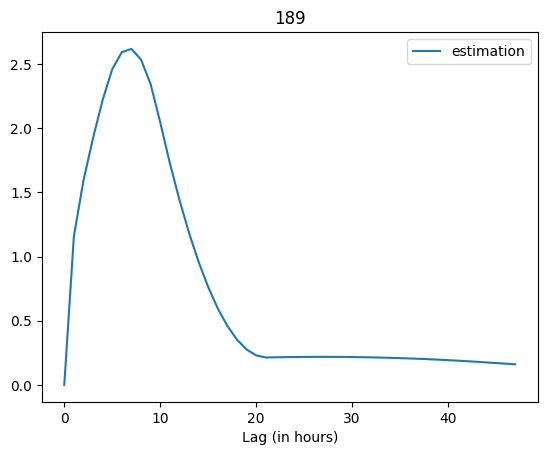

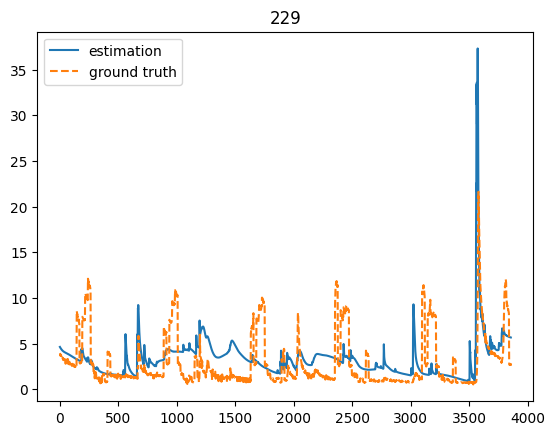

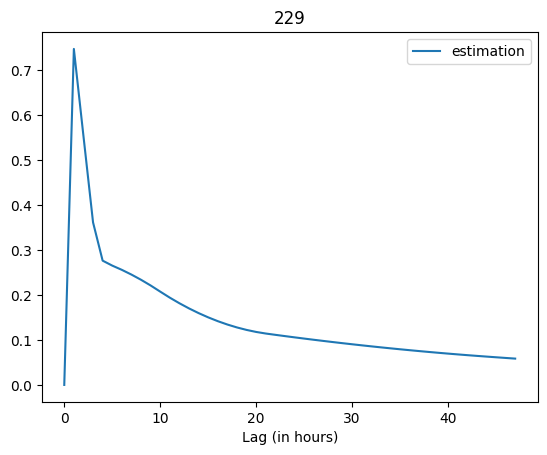

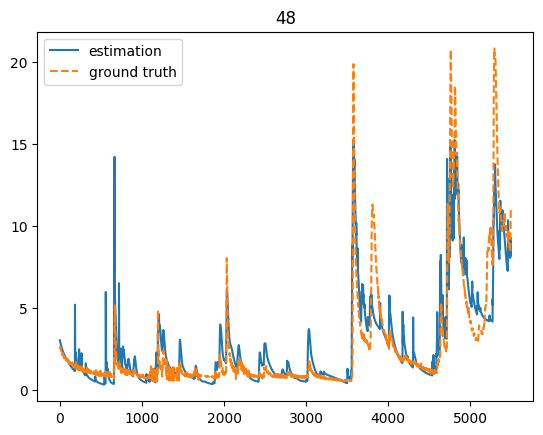

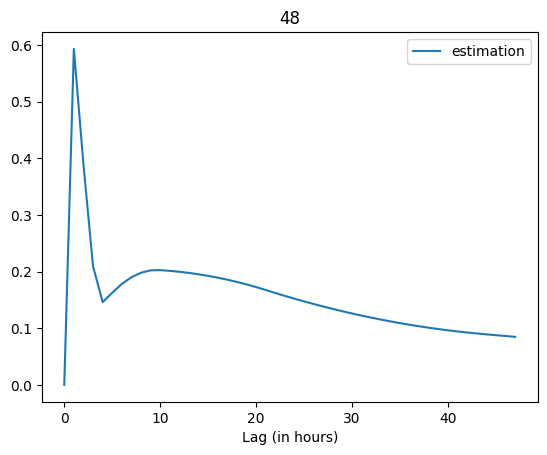

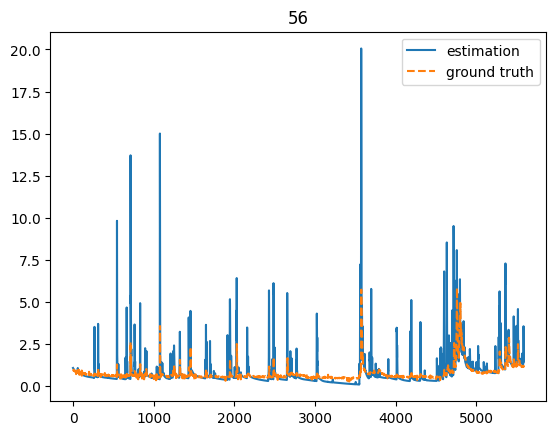

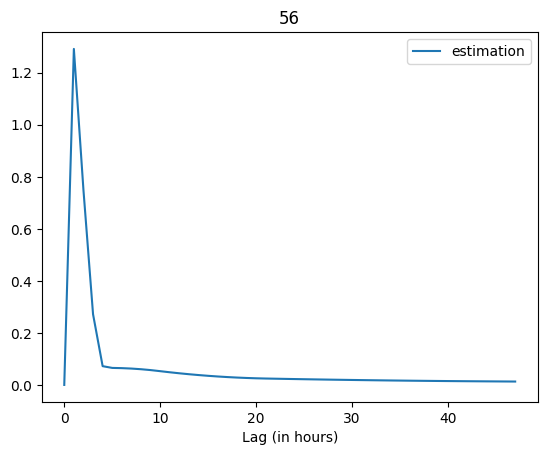

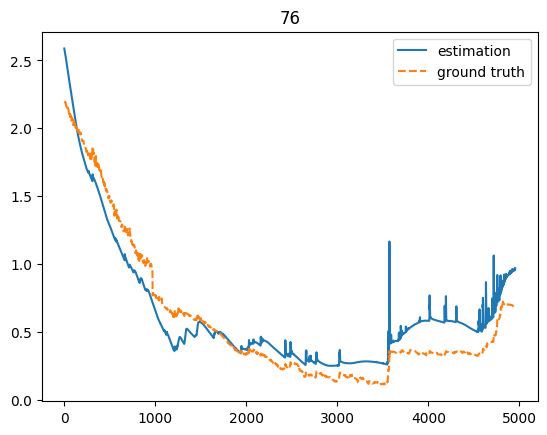

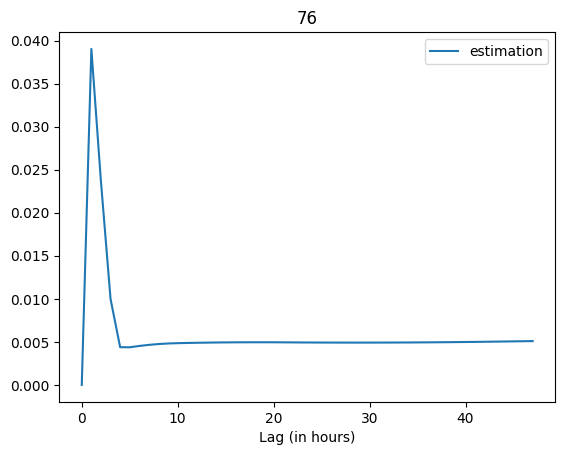

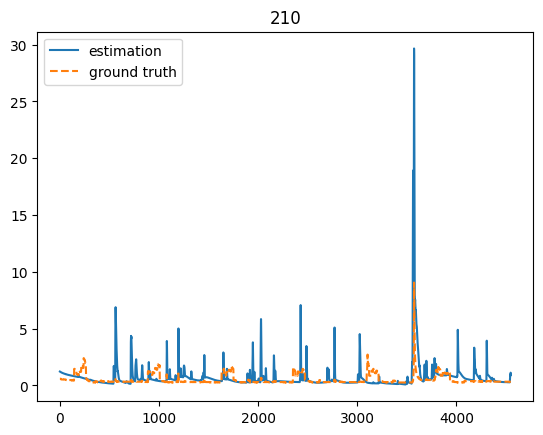

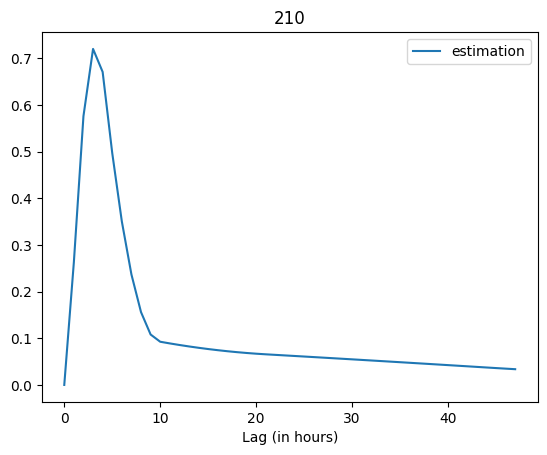

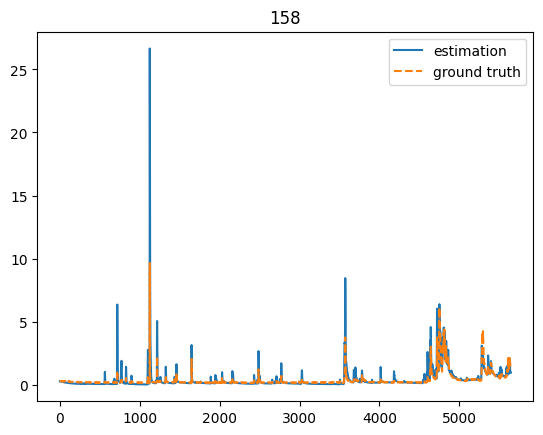

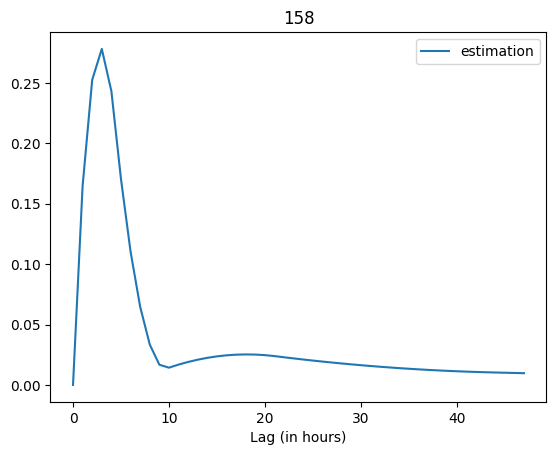

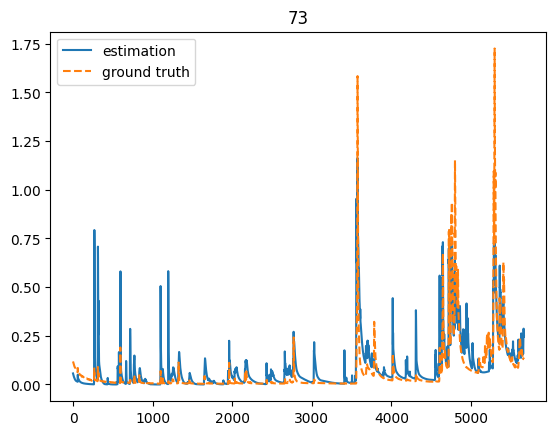

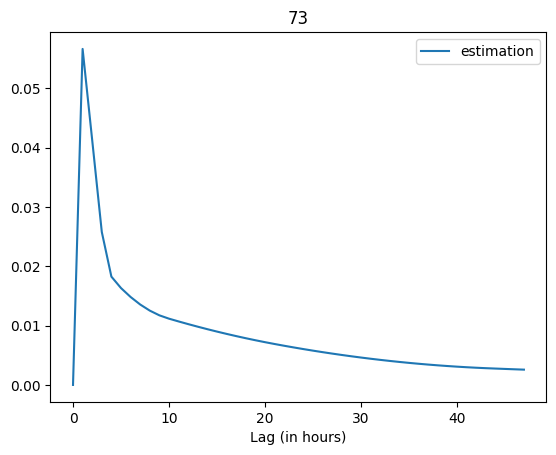

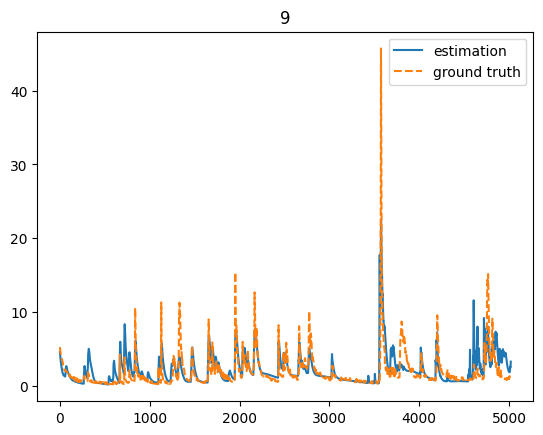

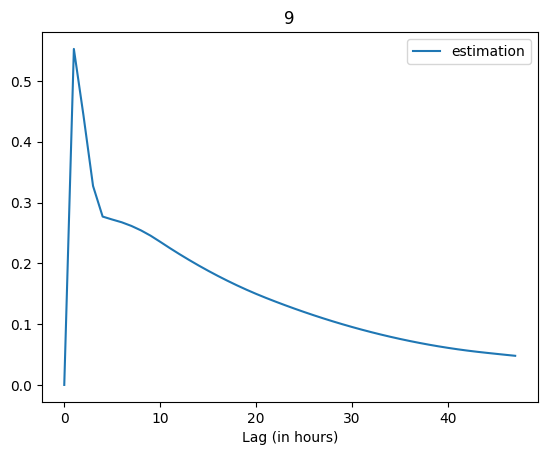

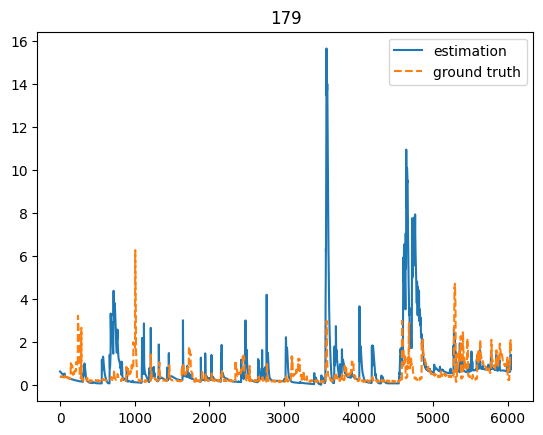

KeyboardInterrupt: 

In [15]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('/mydata/watres/quentin/code/FLOW/hourly_analysis/')
import GAMCR
import os

root = '/mydata/watres/quentin/code/FLOW/hourly_analysis/RES_GAMCR/real_data/'

all_GISID = [el[:-len('b_trained_mode.pkl')] for el in os.listdir(root) if 'trained_model' in el]

for site in all_GISID:#,'Pully_notflashy', 'Lugano_notflashy','Lugano_flashy']:
    model = GAMCR.model.GAMCR(features = {'date':True})
    model.load_model(os.path.join(root,'{0}_trained_model.pkl'.format(site)))
    X, matJ, y, timeyear, dates = model.load_data(os.path.join(root, '{0}/data/'.format(site)), max_files=5)
    yhat = model.predict_streamflow(matJ)
    plt.figure()
    plt.plot(yhat, label='estimation')
    plt.plot(y, label='ground truth', linestyle='--')
    plt.title(site)
    plt.legend()
    plt.show()
    H = model.predict_transfer_function(X)
    plt.figure()
    plt.plot(H.mean(axis=0)[:24*2], label='estimation')
    plt.xlabel('Lag (in hours)')
    plt.title(site)
    plt.legend()
    plt.show()

In [24]:
import pickle
for GISID in all_GISID[:5]:
    with open(os.path.join(root, GISID, 'data', 'params.pkl'), 'rb') as handle:
        b = pickle.load(handle)
    print(b['gam']['edge_knots_'])
    print('\n')

[array([ 0.        , 56.96713638]), array([ 0.        , 78.99622536]), array([0.        , 6.99703976]), array([0.        , 2.23610991]), array([0.        , 1.42621858]), array([0.        , 0.50064423]), array([0.        , 0.40726628]), array([0.        , 0.37461565]), array([0.        , 6.93318059]), array([0.        , 6.43927597]), array([0.        , 6.02909305]), array([0.        , 4.99279448])]


[array([ 0.        , 56.96713638]), array([ 0.        , 78.99622536]), array([0.        , 6.99703976]), array([0.        , 2.23610991]), array([0.        , 1.42621858]), array([0.        , 0.50064423]), array([0.        , 0.40726628]), array([0.        , 0.37461565]), array([0.        , 6.93318059]), array([0.        , 6.43927597]), array([0.        , 6.02909305]), array([0.        , 4.99279448])]


[array([ 0.        , 56.96713638]), array([ 0.        , 78.99622536]), array([0.        , 6.99703976]), array([0.        , 2.23610991]), array([0.        , 1.42621858]), array([0.        , 0.500